### Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

### Load and Explore the Dataset

In [2]:
# Load the Diabetes dataset
data = load_diabetes()

# Extract features and target variable
X = data.data
y = data.target

# Convert features and target into a DataFrame for easier manipulation
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

In [3]:
# Display the first few rows of the dataset
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


### Split the Model

In [4]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42)

In [5]:
print(X.shape, X_train.shape)

(442, 10) (353, 10)


### Initialize the Model

In [6]:
# Initialize the CatBoost Regressor
model = CatBoostRegressor(iterations=1000,  # Number of boosting iterations
                depth=6,           # Depth of the trees
                learning_rate=0.1,  # Learning rate
                loss_function='RMSE',  # Root Mean Squared Error loss function
                random_state=42)  # For reproducibility

### Fit the Model

In [7]:
# Fit the model on the training data
model.fit(X_train, y_train, verbose=200)

0:	learn: 74.7997821	total: 234ms	remaining: 3m 53s
200:	learn: 19.7394012	total: 923ms	remaining: 3.67s
400:	learn: 9.3632759	total: 1.63s	remaining: 2.44s
600:	learn: 4.1770845	total: 2.3s	remaining: 1.52s
800:	learn: 1.8097155	total: 3.29s	remaining: 819ms
999:	learn: 0.8039924	total: 4.09s	remaining: 0us


### Make Predictions and Evaluate the Model

In [8]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Optionally, calculate RMSE
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 3007.1994114251365
Root Mean Squared Error: 54.837937702152296


### Hyperparameter Tuning Using GridSearchCV

In [9]:
# Define the parameter grid
param_grid = {
    'iterations': [500, 1000],
    'depth': [6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'l2_leaf_reg': [3, 5, 7]  # Regularization term
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_}')

Fitting 3 folds for each of 54 candidates, totalling 162 fits
0:	learn: 77.6294435	total: 6.5ms	remaining: 3.24s
1:	learn: 77.3254879	total: 12.6ms	remaining: 3.14s
2:	learn: 77.0144979	total: 18ms	remaining: 2.98s
3:	learn: 76.7112563	total: 22.4ms	remaining: 2.78s
4:	learn: 76.4777261	total: 27.6ms	remaining: 2.73s
5:	learn: 76.1647284	total: 33.3ms	remaining: 2.74s
6:	learn: 75.8914377	total: 38.9ms	remaining: 2.74s
7:	learn: 75.6077886	total: 44.3ms	remaining: 2.73s
8:	learn: 75.3564568	total: 50ms	remaining: 2.73s
9:	learn: 75.0700486	total: 55.5ms	remaining: 2.72s
10:	learn: 74.7788639	total: 60.7ms	remaining: 2.7s
11:	learn: 74.5043982	total: 65.7ms	remaining: 2.67s
12:	learn: 74.2020923	total: 71.3ms	remaining: 2.67s
13:	learn: 73.9105457	total: 76.6ms	remaining: 2.66s
14:	learn: 73.6416892	total: 81.2ms	remaining: 2.63s
15:	learn: 73.3592812	total: 86.1ms	remaining: 2.6s
16:	learn: 73.0915424	total: 91.3ms	remaining: 2.6s
17:	learn: 72.8284653	total: 96.9ms	remaining: 2.6s
18:

188:	learn: 51.0093329	total: 1.17s	remaining: 1.92s
189:	learn: 50.9313253	total: 1.17s	remaining: 1.91s
190:	learn: 50.8558511	total: 1.18s	remaining: 1.91s
191:	learn: 50.7869860	total: 1.18s	remaining: 1.9s
192:	learn: 50.7238004	total: 1.19s	remaining: 1.89s
193:	learn: 50.6447682	total: 1.19s	remaining: 1.88s
194:	learn: 50.5720809	total: 1.2s	remaining: 1.87s
195:	learn: 50.5165203	total: 1.2s	remaining: 1.86s
196:	learn: 50.4540882	total: 1.21s	remaining: 1.86s
197:	learn: 50.4039340	total: 1.21s	remaining: 1.85s
198:	learn: 50.3500783	total: 1.22s	remaining: 1.84s
199:	learn: 50.2803983	total: 1.22s	remaining: 1.83s
200:	learn: 50.2046513	total: 1.23s	remaining: 1.82s
201:	learn: 50.1704584	total: 1.23s	remaining: 1.82s
202:	learn: 50.1142670	total: 1.24s	remaining: 1.81s
203:	learn: 50.0644662	total: 1.24s	remaining: 1.8s
204:	learn: 50.0062164	total: 1.25s	remaining: 1.79s
205:	learn: 49.9333988	total: 1.25s	remaining: 1.79s
206:	learn: 49.8985160	total: 1.26s	remaining: 1.7

365:	learn: 43.8147018	total: 2.09s	remaining: 764ms
366:	learn: 43.7817931	total: 2.09s	remaining: 758ms
367:	learn: 43.7651854	total: 2.1s	remaining: 753ms
368:	learn: 43.7327821	total: 2.1s	remaining: 747ms
369:	learn: 43.7006038	total: 2.11s	remaining: 741ms
370:	learn: 43.6645132	total: 2.11s	remaining: 735ms
371:	learn: 43.6285491	total: 2.12s	remaining: 729ms
372:	learn: 43.6012803	total: 2.12s	remaining: 723ms
373:	learn: 43.5765926	total: 2.13s	remaining: 718ms
374:	learn: 43.5412681	total: 2.13s	remaining: 712ms
375:	learn: 43.5032987	total: 2.14s	remaining: 706ms
376:	learn: 43.4662559	total: 2.15s	remaining: 700ms
377:	learn: 43.4391703	total: 2.15s	remaining: 694ms
378:	learn: 43.4101645	total: 2.15s	remaining: 688ms
379:	learn: 43.3783619	total: 2.16s	remaining: 682ms
380:	learn: 43.3608267	total: 2.17s	remaining: 677ms
381:	learn: 43.3326344	total: 2.17s	remaining: 671ms
382:	learn: 43.3153674	total: 2.18s	remaining: 665ms
383:	learn: 43.2841253	total: 2.18s	remaining: 6

### Train the Best model

In [10]:
# Retrieve the best model from the grid search
best_model = grid_search.best_estimator_

# Fit the best model
best_model.fit(X_train, y_train)

# Make predictions with the best model
y_pred_best = best_model.predict(X_test)

# Calculate the MSE for the best model
mse_best = mean_squared_error(y_test, y_pred_best)
print(f'Mean Squared Error for best model: {mse_best}')

0:	learn: 77.6294435	total: 6.54ms	remaining: 3.26s
1:	learn: 77.3254879	total: 11.7ms	remaining: 2.92s
2:	learn: 77.0144979	total: 17.4ms	remaining: 2.88s
3:	learn: 76.7112563	total: 22.8ms	remaining: 2.83s
4:	learn: 76.4777261	total: 28.6ms	remaining: 2.83s
5:	learn: 76.1647284	total: 34.4ms	remaining: 2.83s
6:	learn: 75.8914377	total: 39.8ms	remaining: 2.8s
7:	learn: 75.6077886	total: 43.9ms	remaining: 2.7s
8:	learn: 75.3564568	total: 49.4ms	remaining: 2.69s
9:	learn: 75.0700486	total: 54.5ms	remaining: 2.67s
10:	learn: 74.7788639	total: 59.6ms	remaining: 2.65s
11:	learn: 74.5043982	total: 65.1ms	remaining: 2.65s
12:	learn: 74.2020923	total: 70.8ms	remaining: 2.65s
13:	learn: 73.9105457	total: 75.7ms	remaining: 2.63s
14:	learn: 73.6416892	total: 80.6ms	remaining: 2.6s
15:	learn: 73.3592812	total: 85.8ms	remaining: 2.6s
16:	learn: 73.0915424	total: 89.9ms	remaining: 2.55s
17:	learn: 72.8284653	total: 95.1ms	remaining: 2.55s
18:	learn: 72.5303016	total: 101ms	remaining: 2.55s
19:	lear

163:	learn: 52.6504663	total: 858ms	remaining: 1.76s
164:	learn: 52.5875232	total: 864ms	remaining: 1.75s
165:	learn: 52.5124682	total: 870ms	remaining: 1.75s
166:	learn: 52.4425187	total: 875ms	remaining: 1.74s
167:	learn: 52.3781092	total: 880ms	remaining: 1.74s
168:	learn: 52.3208045	total: 885ms	remaining: 1.73s
169:	learn: 52.2458181	total: 890ms	remaining: 1.73s
170:	learn: 52.1822107	total: 896ms	remaining: 1.72s
171:	learn: 52.1127630	total: 901ms	remaining: 1.72s
172:	learn: 52.0421764	total: 906ms	remaining: 1.71s
173:	learn: 51.9615242	total: 911ms	remaining: 1.71s
174:	learn: 51.8923642	total: 916ms	remaining: 1.7s
175:	learn: 51.8284243	total: 921ms	remaining: 1.7s
176:	learn: 51.7503897	total: 926ms	remaining: 1.69s
177:	learn: 51.6739137	total: 931ms	remaining: 1.68s
178:	learn: 51.6139199	total: 937ms	remaining: 1.68s
179:	learn: 51.5586426	total: 943ms	remaining: 1.68s
180:	learn: 51.4879076	total: 947ms	remaining: 1.67s
181:	learn: 51.4367006	total: 952ms	remaining: 1

324:	learn: 45.0153755	total: 1.89s	remaining: 1.02s
325:	learn: 44.9799846	total: 1.9s	remaining: 1.01s
326:	learn: 44.9511187	total: 1.9s	remaining: 1.01s
327:	learn: 44.9156774	total: 1.91s	remaining: 1s
328:	learn: 44.8770218	total: 1.91s	remaining: 995ms
329:	learn: 44.8514789	total: 1.92s	remaining: 989ms
330:	learn: 44.8130386	total: 1.92s	remaining: 983ms
331:	learn: 44.7734115	total: 1.93s	remaining: 976ms
332:	learn: 44.7571707	total: 1.93s	remaining: 970ms
333:	learn: 44.7378613	total: 1.94s	remaining: 964ms
334:	learn: 44.7055660	total: 1.94s	remaining: 958ms
335:	learn: 44.6928081	total: 1.95s	remaining: 952ms
336:	learn: 44.6527233	total: 1.96s	remaining: 946ms
337:	learn: 44.6336988	total: 1.96s	remaining: 939ms
338:	learn: 44.6106688	total: 1.97s	remaining: 933ms
339:	learn: 44.5681771	total: 1.97s	remaining: 927ms
340:	learn: 44.5403178	total: 1.98s	remaining: 922ms
341:	learn: 44.4969587	total: 1.98s	remaining: 916ms
342:	learn: 44.4639507	total: 1.99s	remaining: 909m

481:	learn: 40.8366267	total: 2.73s	remaining: 102ms
482:	learn: 40.8332014	total: 2.73s	remaining: 96ms
483:	learn: 40.8125403	total: 2.73s	remaining: 90.4ms
484:	learn: 40.7809873	total: 2.74s	remaining: 84.7ms
485:	learn: 40.7633623	total: 2.74s	remaining: 79ms
486:	learn: 40.7186789	total: 2.75s	remaining: 73.4ms
487:	learn: 40.6895778	total: 2.75s	remaining: 67.7ms
488:	learn: 40.6459637	total: 2.76s	remaining: 62.1ms
489:	learn: 40.6285212	total: 2.76s	remaining: 56.4ms
490:	learn: 40.6085616	total: 2.77s	remaining: 50.8ms
491:	learn: 40.5684372	total: 2.77s	remaining: 45.1ms
492:	learn: 40.5350282	total: 2.78s	remaining: 39.5ms
493:	learn: 40.5104201	total: 2.79s	remaining: 33.8ms
494:	learn: 40.4918574	total: 2.79s	remaining: 28.2ms
495:	learn: 40.4701105	total: 2.8s	remaining: 22.6ms
496:	learn: 40.4231216	total: 2.8s	remaining: 16.9ms
497:	learn: 40.4060468	total: 2.81s	remaining: 11.3ms
498:	learn: 40.3934108	total: 2.81s	remaining: 5.64ms
499:	learn: 40.3775855	total: 2.82s

### Feature Importance

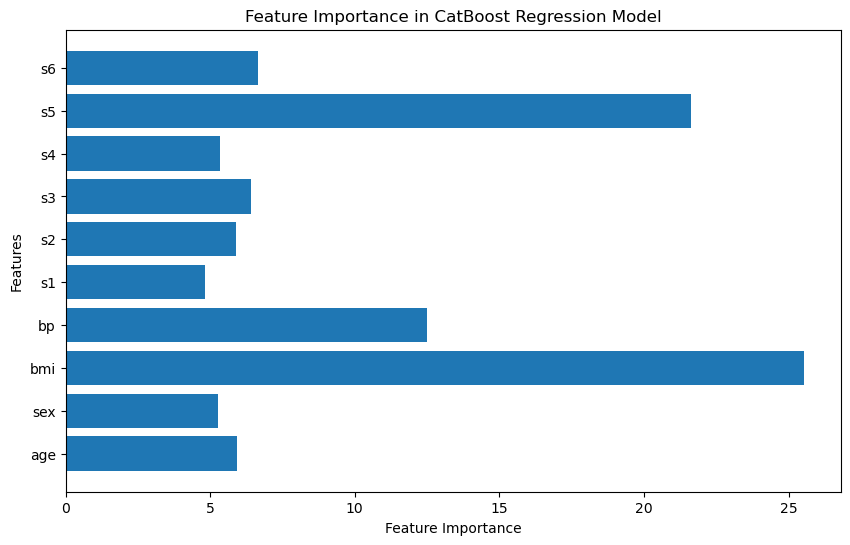

In [11]:
# Plot feature importance for the best model
feature_importances = best_model.get_feature_importance()
features = data.feature_names

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in CatBoost Regression Model')
plt.show()